In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
data_file = "new_india-fii-yeild.xlsx"
data = pd.read_excel(data_file)
data.columns = ["date", "fii", "yield"]
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
data.head()


,fii,yield
date,,
2011-02-01,-4813,7.992
2011-03-01,-4585,7.985
2011-04-01,6896,8.135
2011-05-01,7211,8.411
2011-06-01,-6613,8.326


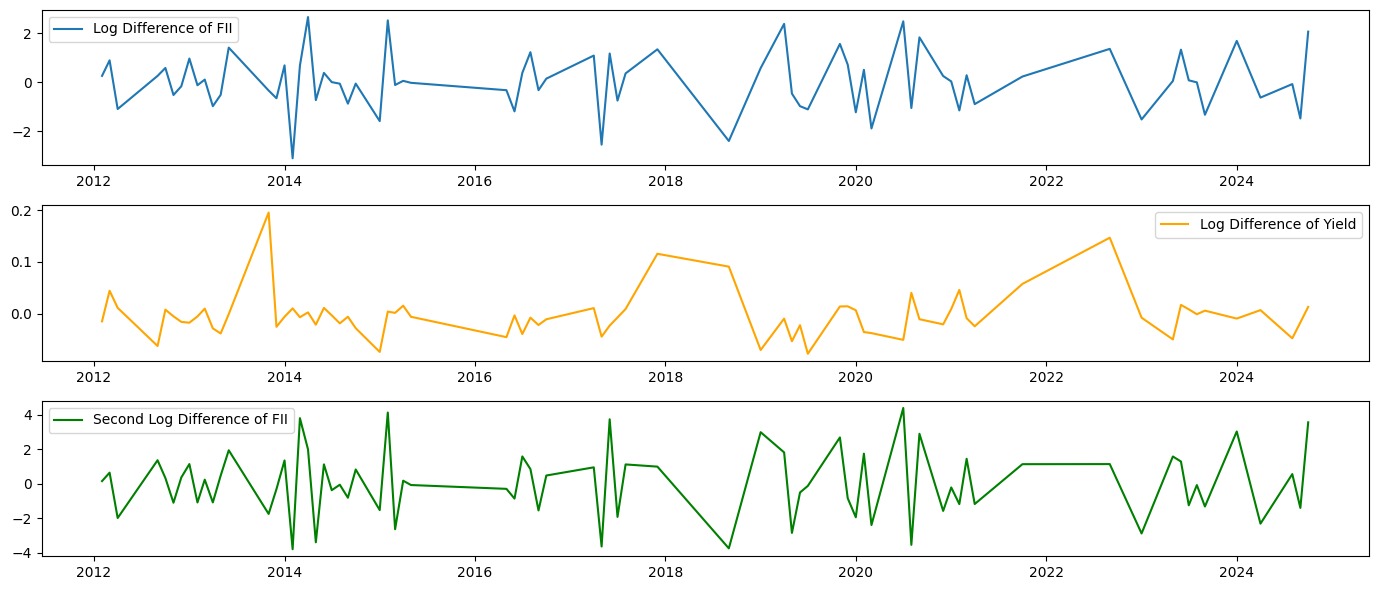

In [5]:
# Log transformation and differencing
data["log_fii"] = np.log(data["fii"])
data["log_yield"] = np.log(data["yield"])
data["log_diff_fii"] = data["log_fii"].diff()
data["log_diff_yield"] = data["log_yield"].diff()

# Additional differencing for FII if not stationary
data["log_diff2_fii"] = data["log_diff_fii"].diff()

# Drop the first row (NaN from differencing)
data = data.dropna()
# Plot the log differences to visually inspect stationarity
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.plot(data["log_diff_fii"], label="Log Difference of FII")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(data["log_diff_yield"], label="Log Difference of Yield", color="orange")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(data["log_diff2_fii"], label="Second Log Difference of FII", color="green")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Perform Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(series, series_name):
    result = adfuller(series)
    print(f"ADF Test for {series_name}")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] < 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is not stationary.\n")

adf_test(data["log_diff_fii"], "Log Difference of FII")
adf_test(data["log_diff_yield"], "Log Difference of Yield")
adf_test(data["log_diff2_fii"].dropna(), "Second Log Difference of FII")

ADF Test for Log Difference of FII
Test Statistic: -6.031216082493134
p-value: 1.4164920992664983e-07
Critical Values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765
The series is stationary.

ADF Test for Log Difference of Yield
Test Statistic: -6.935506797657549
p-value: 1.057198885454934e-09
Critical Values:
	1%: -3.524624466842421
	5%: -2.9026070739026064
	10%: -2.5886785262345677
The series is stationary.

ADF Test for Second Log Difference of FII
Test Statistic: -5.701325429036422
p-value: 7.663967456709083e-07
Critical Values:
	1%: -3.5386953618719676
	5%: -2.9086446751210775
	10%: -2.591896782564878
The series is stationary.



In [7]:
# 1. Granger Causality Test
def granger_causality_test(data, max_lag):
    print("Granger Causality Test Results:")
    test_result = sm.tsa.stattools.grangercausalitytests(data, max_lag, verbose=True)
    return test_result

# Prepare data for Granger Causality Test
granger_data = data[["log_diff_fii", "log_diff_yield"]]
max_lag = 5
granger_causality_test(granger_data, max_lag)

Granger Causality Test Results:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4333  , p=0.0388  , df_denom=70, df_num=1
ssr based chi2 test:   chi2=4.6233  , p=0.0315  , df=1
likelihood ratio test: chi2=4.4828  , p=0.0342  , df=1
parameter F test:         F=4.4333  , p=0.0388  , df_denom=70, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9939  , p=0.3755  , df_denom=67, df_num=2
ssr based chi2 test:   chi2=2.1362  , p=0.3437  , df=2
likelihood ratio test: chi2=2.1052  , p=0.3490  , df=2
parameter F test:         F=0.9939  , p=0.3755  , df_denom=67, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8984  , p=0.4470  , df_denom=64, df_num=3
ssr based chi2 test:   chi2=2.9901  , p=0.3932  , df=3
likelihood ratio test: chi2=2.9289  , p=0.4027  , df=3
parameter F test:         F=0.8984  , p=0.4470  , df_denom=64, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:     

e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(4.433324521248152),
    np.float64(0.03883298257799344),
    np.float64(70.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(4.623324143587357),
    np.float64(0.03154005815611092),
    np.int64(1)),
   'lrtest': (np.float64(4.482821210996121),
    np.float64(0.03423716064930032),
    np.int64(1)),
   'params_ftest': (np.float64(4.433324521248142),
    np.float64(0.03883298257799376),
    np.float64(70.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.9939470556366541),
    np.float64(0.3755036294971307),
    np.float64(67.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.136244418084749),
    np.float64(0.34365322083078226),
    np.int64(2)),
   'lrtest': (np.float64(2.1051663948609303),
    np.float64(0.34903495736351065),
    np.int64(2)),
   'params_ftest': (np.float64(0.993947055636657),
    np.float64(0.3755036294971277),
    np.float64(67.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
          

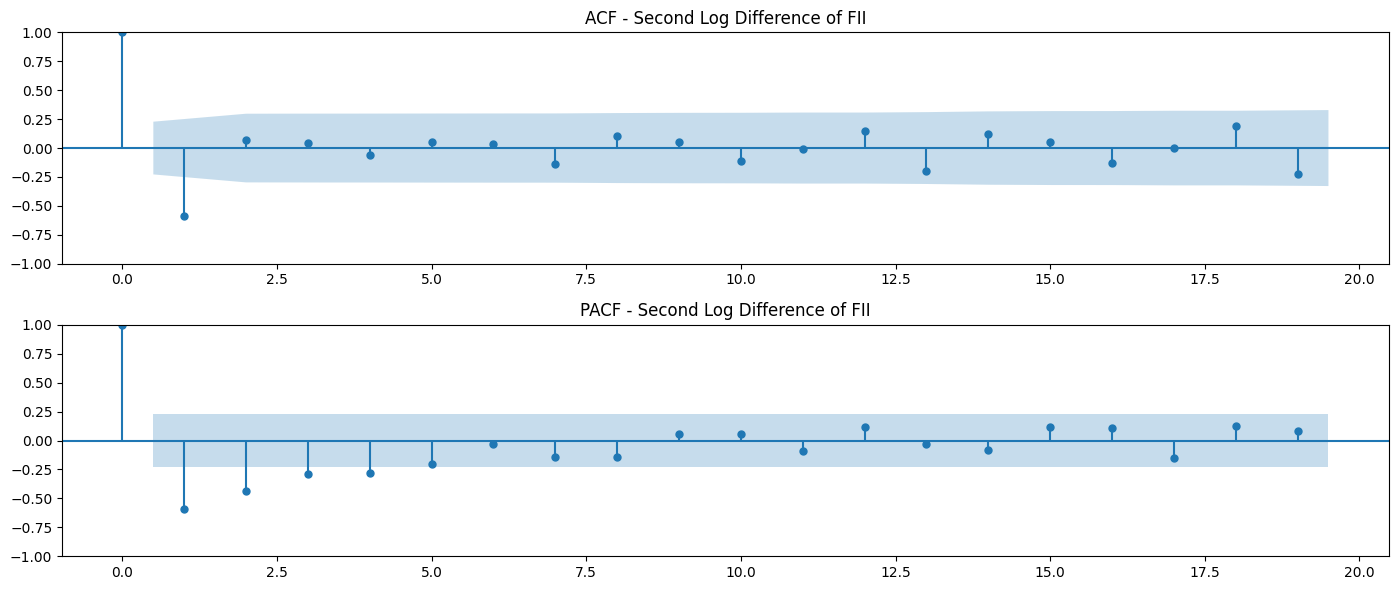

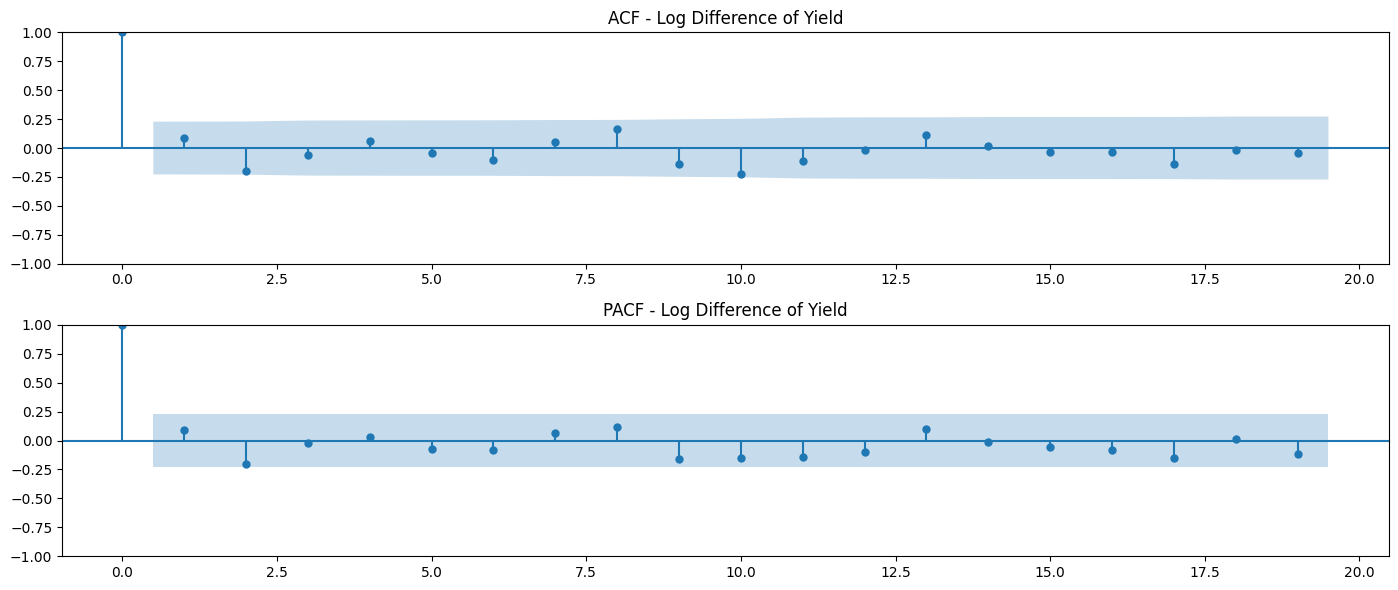

In [14]:
# 2. Check for Autocorrelation using ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(data["log_diff2_fii"].dropna(), ax=plt.gca(), title="ACF - Second Log Difference of FII")
plt.subplot(2, 1, 2)
plot_pacf(data["log_diff2_fii"].dropna(), ax=plt.gca(), title="PACF - Second Log Difference of FII")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plot_acf(data["log_diff_yield"], ax=plt.gca(), title="ACF - Log Difference of Yield")
plt.subplot(2, 1, 2)
plot_pacf(data["log_diff_yield"], ax=plt.gca(), title="PACF - Log Difference of Yield")
plt.tight_layout()
plt.show()


In [15]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Determine Lag Order for VAR
def determine_var_lag(data):
    model = VAR(data)
    lag_order_results = model.select_order(maxlags=10)
    print("Lag Order Selection for VAR:")
    print(lag_order_results.summary())
    return lag_order_results.aic

# Step 2: Fit VAR Model
def fit_var_model(data, lag_order):
    model = VAR(data)
    var_result = model.fit(lag_order)
    print(var_result.summary())
    return var_result

# Step 3: Fit ARIMA Model
def fit_arima_model(series, p, d, q):
    model = ARIMA(series, order=(p, d, q))
    arima_result = model.fit()
    print(arima_result.summary())
    return arima_result
# Example Usage:
# 1. Determine VAR Lag Order
lag_order = determine_var_lag(granger_data)

# 2. Fit VAR Model with Optimal Lag
var_result = fit_var_model(granger_data, lag_order)

# 3. Fit ARIMA Model for FII (Second Log Difference)
arima_result_fii = fit_arima_model(data["log_diff2_fii"].dropna(), p=1, d=0, q=1)  # Adjust (p, d, q) based on ACF/PACF

# 4. Fit ARIMA Model for Yield (Log Difference)
arima_result_yield = fit_arima_model(data["log_diff_yield"].dropna(), p=1, d=0, q=1)  # Adjust (p, d, q)

e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Lag Order Selection for VAR:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -5.685      -5.618    0.003396      -5.659
1      -5.925*     -5.723*   0.002671*     -5.846*
2       -5.886      -5.549    0.002779      -5.753
3       -5.842      -5.370    0.002907      -5.656
4       -5.826      -5.219    0.002960      -5.587
5       -5.822      -5.080    0.002982      -5.530
6       -5.823      -4.946    0.002992      -5.478
7       -5.855      -4.843    0.002916      -5.457
8       -5.826      -4.679    0.003029      -5.374
9       -5.748      -4.467    0.003307      -5.243
10      -5.698      -4.281    0.003527      -5.140
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Jan, 2025
Time:                     17:25:23
-------------------------------

e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_diff_yield   No. Observations:                   74
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 128.174
Date:                Thu, 23 Jan 2025   AIC                           -248.348
Time:                        17:25:25   BIC                           -239.132
Sample:                             0   HQIC                          -244.671
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.008     -0.348      0.728      -0.018       0.012
ar.L1         -0.3883      0.754     -0.515      0.607      -1.866       1.090
ma.L1          0.5344      0.752      0.711      0.4